### Mounting Data From Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Installing Libraries

In [ ]:
pip install Cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 11.1 MB/s eta 0:00:00


### Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import gc
import re
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import StratifiedKFold
from matplotlib.colors import ListedColormap
from sklearn.cluster import SpectralClustering
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from imblearn.combine import SMOTETomek

from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import  RadiusNeighborsClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import NuSVC
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import RandomizedSearchCV
from imblearn.under_sampling import TomekLinks

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform, randint
import xgboost as xgb
# from catboost import Pool, CatBoostClassifier, cv
# from pyod.models.xgbod import XGBOD
from sklearn.metrics import precision_recall_curve
from xgboost import plot_importance


import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from collections import Counter
from wordcloud import WordCloud


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict

from datetime import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from statsmodels.tsa.arima.model import ARIMA
import geopandas as gpd
import cartopy.crs as ccrs
import cartopy

from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, BertModel

from scipy.sparse import csr_matrix, hstack

import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from torch.cuda.amp import autocast, GradScaler


import warnings
import sys

In [ ]:
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

In [ ]:
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)


warnings.filterwarnings('ignore')

### Reading DataFile into a DataFrame

In [ ]:
Dataset = pd.read_csv('/content/drive/MyDrive/Project2DS5500/Dataset.csv',sep=',' , encoding="latin-1")

In [ ]:
Dataset

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star
...,...,...,...,...,...,...,...,...,...,...
33391,33392,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,They treated me very badly.,1 star
33392,33393,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,The service is very good,5 stars
33393,33394,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,To remove hunger is enough,4 stars
33394,33395,McDonald's,Fast food restaurant,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,"It's good, but lately it has become very expen...",5 stars


### Data Preprocessing + Feature Engineering

#### Checking Null Values.

In [ ]:
Dataset.isna().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

#### Exploring other columns and Removing Columns not Needed adding additional columns

In [ ]:
Dataset['store_name'].unique()

array(["McDonald's", "ýýýMcDonald's"], dtype=object)

In [ ]:
Dataset['category'].unique()

array(['Fast food restaurant'], dtype=object)

In [ ]:
Dataset['store_address'].value_counts()

9814 International Dr, Orlando, FL 32819, United States                       1890
5725 W Irlo Bronson Memorial Hwy, Kissimmee, FL 34746, United States          1720
10901 Riverside Dr, North Hollywood, CA 91602, United States                  1710
1415 E State Rd, Fern Park, FL 32730, United States                           1700
632 S R L Thornton Freeway Service Rd, Dallas, TX 75203, United States        1650
3501 Biscayne Blvd, Miami, FL 33137, United States                            1570
621 Broadway, Newark, NJ 07104, United States                                 1290
1100 N US Hwy 377, Roanoke, TX 76262, United States                           1168
72-69 Kissena Blvd, Queens, NY 11367, United States                           1140
429 7th Ave, New York, NY 10001, United States                                1140
724 Broadway, New York, NY 10003, United States                               1140
By Mandalay Bay, 3999 S Las Vegas Blvd, Las Vegas, NV 89119, United States    1030
1698

In [ ]:
len(Dataset['store_address'].unique())

40

In [ ]:
Dataset = Dataset.drop(columns=['reviewer_id','store_name','category',])

In [ ]:
Dataset = Dataset.dropna()

In [ ]:
Dataset.reset_index(drop=True, inplace=True)

In [ ]:
len(Dataset['store_address'].value_counts())

39

In [ ]:
Dataset[['City', 'State']] = Dataset['store_address'].apply(lambda x: pd.Series(x.split(', ')[-3:-1]))

In [ ]:
Dataset['City'].unique()

array(['Austin', 'Brodheadsville', 'Queens', 'New York', 'Washington',
       'Los Angeles', 'San Diego', 'Sunnyvale', 'Orlando',
       'Salt Lake City', 'Miami Beach', 'Champlain', 'Santa Monica',
       'San Antonio', 'Oak Park', 'North Hollywood', 'Voorhees Township',
       'Roanoke', 'Newark', 'Fort Worth', 'Las Vegas', 'Kissimmee',
       'Fern Park', 'Annandale', 'Dallas', 'Miami'], dtype=object)

In [ ]:
len(Dataset['City'].unique())

26

In [ ]:
Dataset['State'] = Dataset['State'].str.split().str[0]

In [ ]:
len(Dataset['State'].unique())

11

In [ ]:
Dataset['review_time'].unique()

array(['3 months ago', '5 days ago', 'a month ago', '2 months ago',
       '3 weeks ago', 'a year ago', '6 months ago', '5 months ago',
       '7 months ago', '10 months ago', '4 years ago', '8 months ago',
       '4 months ago', '3 years ago', '2 years ago', '9 months ago',
       '11 months ago', '5 years ago', '6 years ago', '7 years ago',
       '8 years ago', '3 days ago', 'a week ago', '2 days ago',
       '2 weeks ago', '10 years ago', '9 years ago', '6 days ago',
       '4 weeks ago', '21 hours ago', '4 days ago', '11 years ago',
       '12 years ago', 'a day ago', '23 hours ago', '6 hours ago',
       '20 hours ago', '22 hours ago', '8 hours ago'], dtype=object)

In [ ]:
len(Dataset['review_time'].unique())

39

In [ ]:
def convert_relative_date(relative_date_str, initial_date):
    # Parse relative date string
    magnitude, unit, ago = relative_date_str.split()

    if magnitude == "a":
      magnitude = 1
    else:
      magnitude = int(magnitude)

    # Determine the unit of time (month, day, hour)
    if unit.startswith('month'):
        delta = relativedelta(months=magnitude)
    elif unit.startswith('day'):
        delta = relativedelta(days=magnitude)
    elif unit.startswith('hour'):
        delta = relativedelta(hours=magnitude)
    elif unit.startswith('year'):
        magnitude = magnitude * 12
        delta = relativedelta(months=magnitude)
    elif unit.startswith('week'):
        magnitude = magnitude * 7
        delta = relativedelta(days=magnitude)
    else:
        raise ValueError("Unsupported time unit: {}".format(unit))

    # Calculate actual date
    actual_date = initial_date - delta
    return actual_date

In [ ]:
converted_dates = []
initial_date = datetime(2023, 6, 19)
for relative_date_str in Dataset['review_time']:
    actual_date = convert_relative_date(relative_date_str, initial_date)
    converted_dates.append(actual_date)

In [ ]:
len(converted_dates)

32736

In [ ]:
Dataset['ActualDate'] = converted_dates

#### Cleaning the reviews and removing all the stop words.

In [ ]:
def clean_review(review):
    review = review.lower()
    review = re.sub(r'[^a-zA-Z\s]', '', review)
    review = re.sub(r'\s+', ' ', review).strip()

    stop_words = set(stopwords.words('english'))
    review_tokens = nltk.word_tokenize(review)
    review = ' '.join([word for word in review_tokens if word not in stop_words])
    return review

In [ ]:
Dataset['review'] = Dataset['review'].apply(clean_review)

In [ ]:
Dataset['Year'] = Dataset['ActualDate'].dt.year

In [ ]:
Dataset['rating'] = Dataset['rating'].str.split().str[0]

In [ ]:
Dataset['rating'] = Dataset['rating'].astype(int)

In [ ]:
Dataset.rename({'latitude ': 'latitude'}, axis=1, inplace=True)

###  EDA on location and review analysis

In [ ]:
Dataset

,store_address,latitude,longitude,rating_count,review_time,review,rating,City,State,ActualDate,Year
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food normal transaction...,1,Austin,TX,2023-03-19,2023
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonalds far food atmosphere go staff mak...,4,Austin,TX,2023-06-14,2023
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked line mov...,1,Austin,TX,2023-06-14,2023
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispy chicken sandwich customer service qu...,5,Austin,TX,2023-05-19,2023
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order times drive thru still manage mes...,1,Austin,TX,2023-04-19,2023
...,...,...,...,...,...,...,...,...,...,...,...
33391,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,treated badly,1,Miami,FL,2019-06-19,2019
33392,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,service good,5,Miami,FL,2022-06-19,2022
33393,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,remove hunger enough,4,Miami,FL,2022-06-19,2022
33394,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,good lately become expensive,5,Miami,FL,2018-06-19,2018


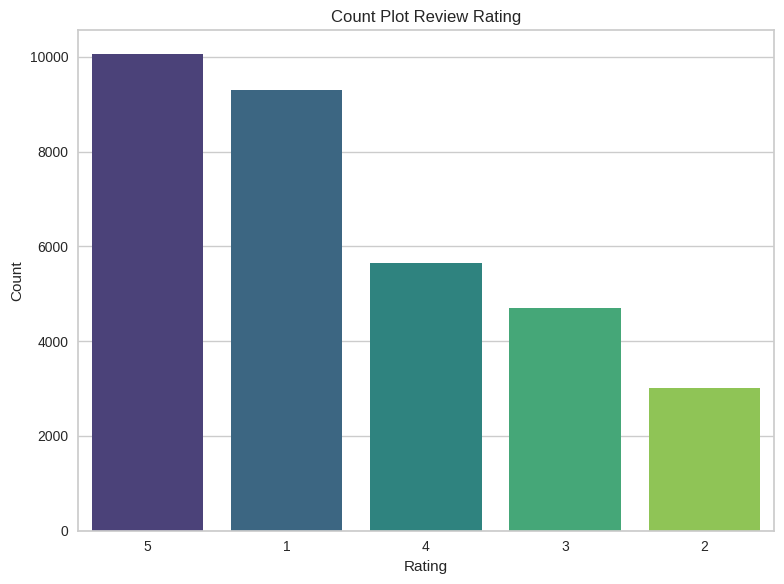

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=Dataset, x='rating', palette='viridis',order=Dataset['rating'].value_counts().index)  # You can customize the color palette
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count Plot Review Rating')
plt.tight_layout()

# Show the plot
plt.show()

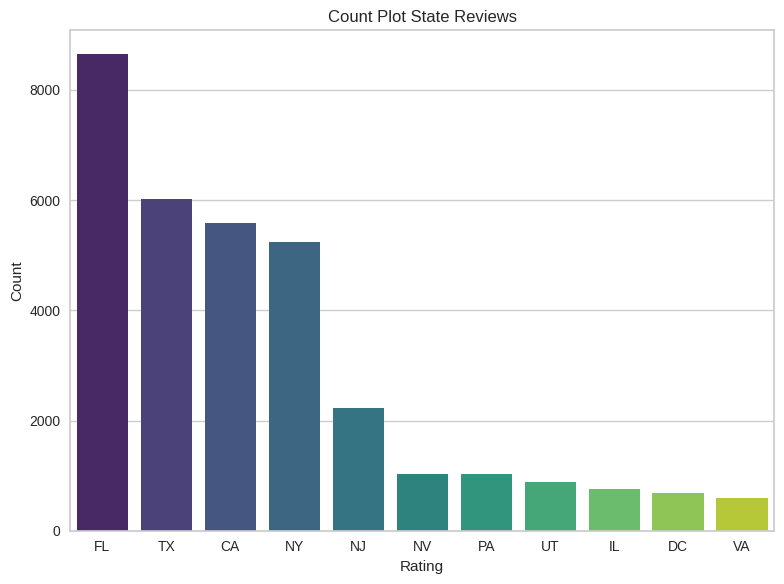

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=Dataset, x='State', palette='viridis',order=Dataset['State'].value_counts().index)  # You can customize the color palette
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count Plot State Reviews')
plt.tight_layout()

# Show the plot
plt.show()

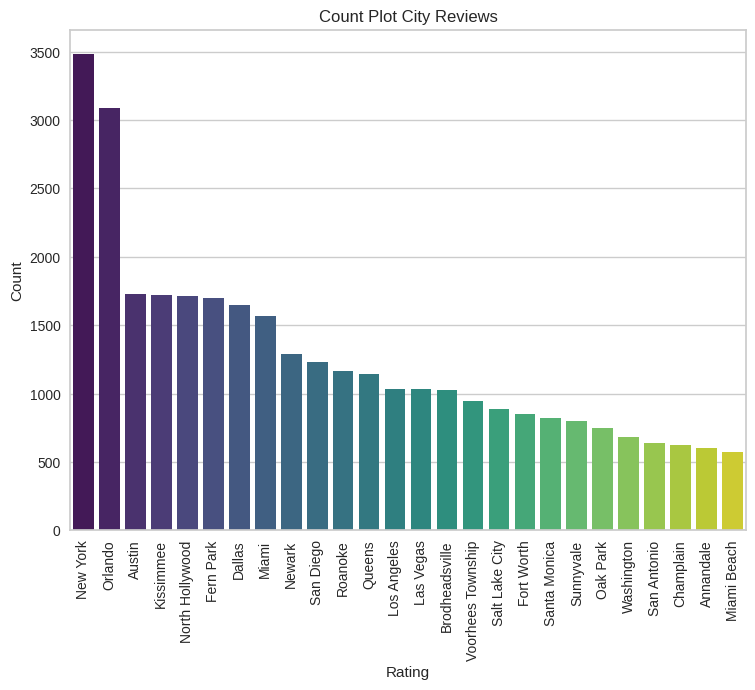

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=Dataset, x='City', palette='viridis',order=Dataset['City'].value_counts().index)  # You can customize the color palette
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Count Plot City Reviews')
plt.tight_layout()

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Show the plot
plt.show()

In [ ]:
average_ratings = Dataset.groupby('City')['rating'].mean().reset_index()
average_ratings = average_ratings.sort_values(by='rating', ascending=False)

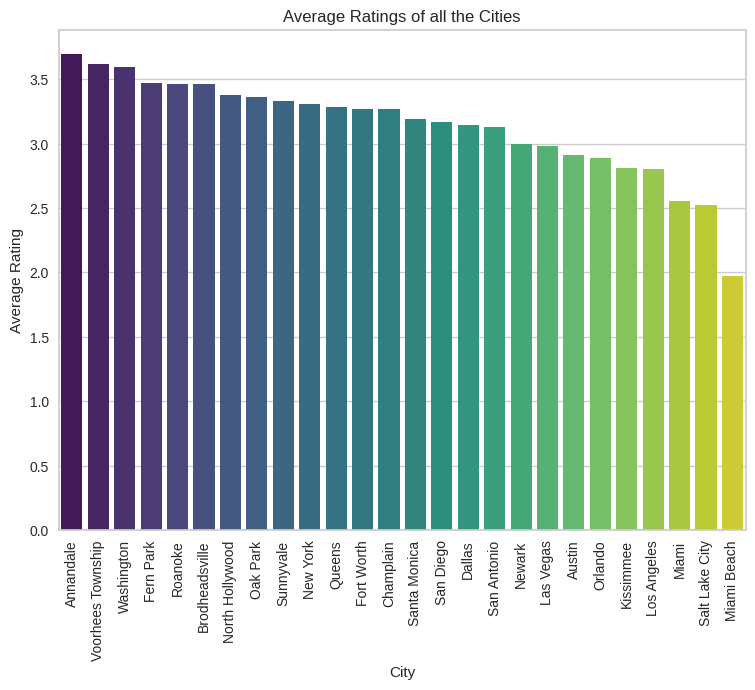

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.barplot(x='City', y='rating', data=average_ratings, palette='viridis') # You can customize the color palette
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.title('Average Ratings of all the Cities')
plt.tight_layout()

ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# Show the plot
plt.show()

In [ ]:
average_ratings_states = Dataset.groupby('State')['rating'].mean().reset_index()
average_ratings_states = average_ratings_states.sort_values(by='rating', ascending=False)

In [ ]:
average_ratings_states

,State,rating
10,VA,3.697674
1,DC,3.594436
7,PA,3.463035
3,IL,3.362184
6,NY,3.299466
4,NJ,3.255710
0,CA,3.191455
8,TX,3.155415
5,NV,2.978641
2,FL,2.867514


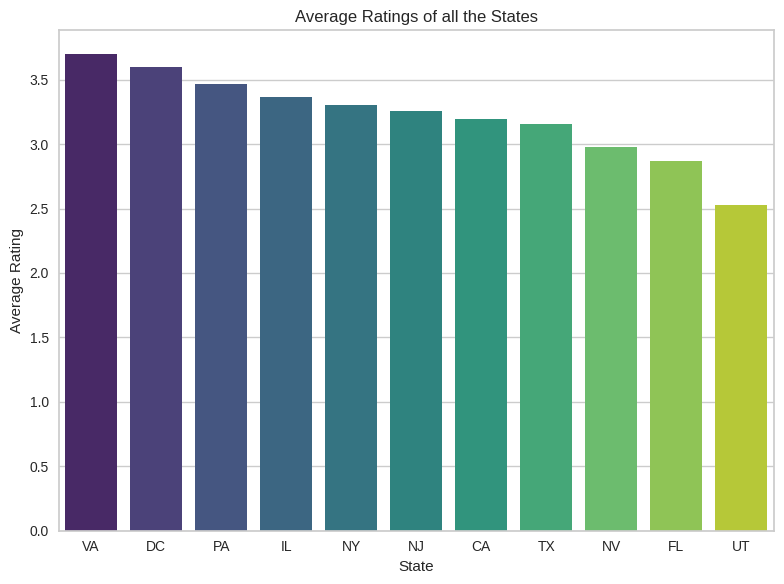

In [ ]:
plt.figure(figsize=(8, 6))

ax = sns.barplot(x='State', y='rating', data=average_ratings_states, palette='viridis') # You can customize the color palette
plt.xlabel('State')
plt.ylabel('Average Rating')
plt.title('Average Ratings of all the States')
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
Dataset

,store_address,latitude,longitude,rating_count,review_time,review,rating,City,State,ActualDate,Year
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food normal transaction...,1,Austin,TX,2023-03-19,2023
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonalds far food atmosphere go staff mak...,4,Austin,TX,2023-06-14,2023
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked line mov...,1,Austin,TX,2023-06-14,2023
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispy chicken sandwich customer service qu...,5,Austin,TX,2023-05-19,2023
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order times drive thru still manage mes...,1,Austin,TX,2023-04-19,2023
...,...,...,...,...,...,...,...,...,...,...,...
33391,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,treated badly,1,Miami,FL,2019-06-19,2019
33392,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,service good,5,Miami,FL,2022-06-19,2022
33393,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,remove hunger enough,4,Miami,FL,2022-06-19,2022
33394,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,good lately become expensive,5,Miami,FL,2018-06-19,2018


In [ ]:
average_ratings_by_stores = Dataset.groupby(['latitude','longitude'])['rating'].mean().reset_index()
average_ratings_by_stores = average_ratings_by_stores.sort_values(by='rating', ascending=False)

In [ ]:
average_ratings_by_stores

,latitude,longitude,rating
22,38.812823,-77.185055,3.697674
31,40.750506,-73.990583,3.692105
5,28.450387,-81.471414,3.687755
18,34.056593,-118.426000,3.666667
25,39.852059,-74.981099,3.615058
24,38.905456,-77.044235,3.598529
12,32.820654,-117.178011,3.598182
6,28.655350,-81.342692,3.470588
14,33.009318,-97.222925,3.465753
36,40.922081,-75.399919,3.463035


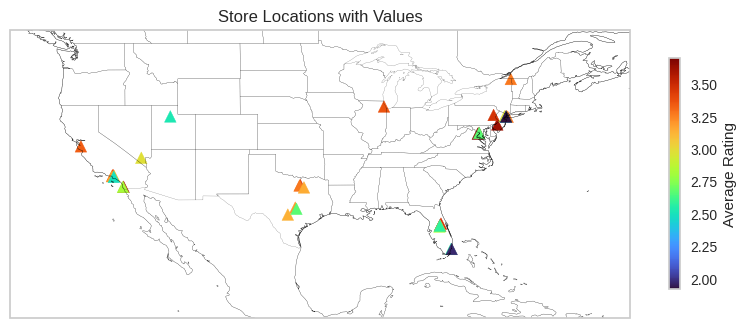

In [ ]:
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
sc = ax.scatter(average_ratings_by_stores['longitude'], average_ratings_by_stores['latitude'], transform=ccrs.PlateCarree(), c=average_ratings_by_stores['rating'], cmap='turbo', s=70, marker='^')

ax.coastlines(linewidth=0.2)
ax.add_feature(cartopy.feature.STATES, linewidth=0.1)
scale = (-130, -60, 18, 45)
ax.set_extent(scale)

plt.colorbar(sc, shrink=0.5, label='Average Rating')

# Add title and labels
plt.title('Store Locations with Values')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show plot
plt.show()

#### NLP ANALYSIS

In [ ]:
Dataset['Words'] = Dataset['review'].apply(lambda x: str(x).split())

In [ ]:
def sentimentofReview(rating):
  if rating == 1 or rating == 2:
    return "negative"
  elif rating == 3:
    return "neutral"
  else:
    return "positive"

In [ ]:
Dataset['Sentiment'] = Dataset['rating'].apply(sentimentofReview)

In [ ]:
DatasetOnlyReviewsForTopState = Dataset[Dataset['State'] == 'VA']
DatasetOnlyReviewsForWorstState = Dataset[Dataset['State'] == 'UT']

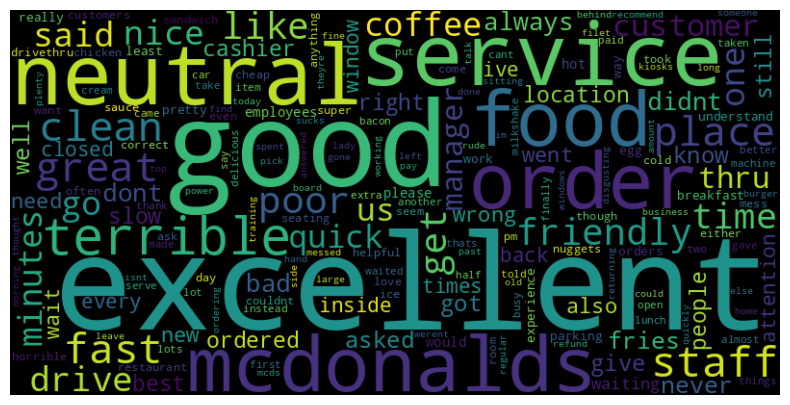

In [ ]:
top = Counter([item for sublist in DatasetOnlyReviewsForTopState['Words'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])

wordcloud_data = temp_neutral.set_index('Common_words')['count'].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

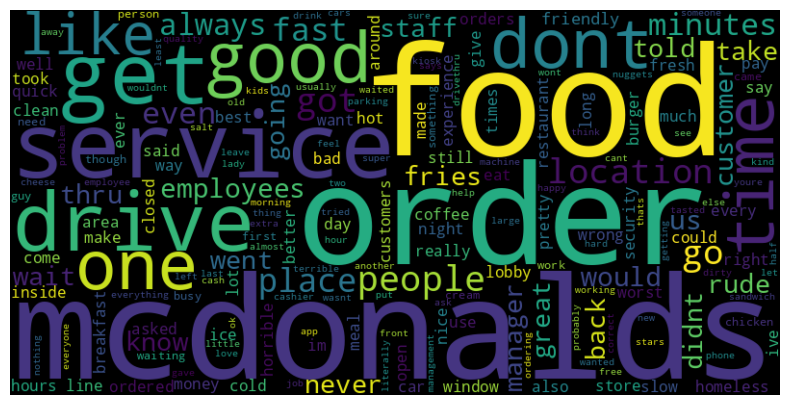

In [ ]:
top = Counter([item for sublist in DatasetOnlyReviewsForWorstState['Words'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])

wordcloud_data = temp_neutral.set_index('Common_words')['count'].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
DatasetOnlyReviewsForTopCity = Dataset[Dataset['City'] == 'Annandale']
DatasetOnlyReviewsForWorstCity = Dataset[Dataset['City'] == 'Miami Beach']

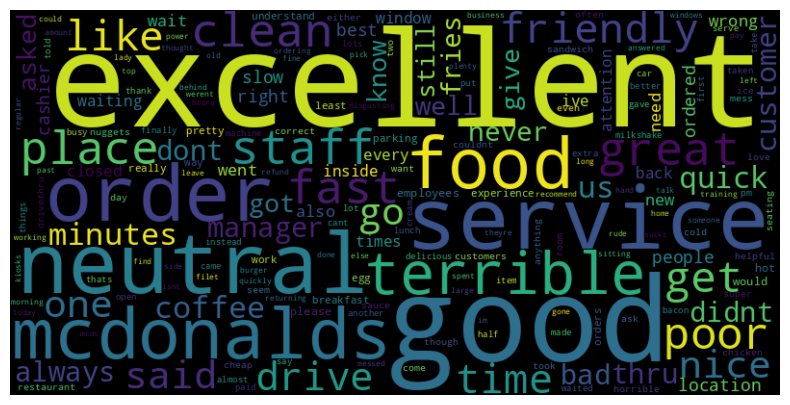

In [ ]:
top = Counter([item for sublist in DatasetOnlyReviewsForTopCity['Words'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])

wordcloud_data = temp_neutral.set_index('Common_words')['count'].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

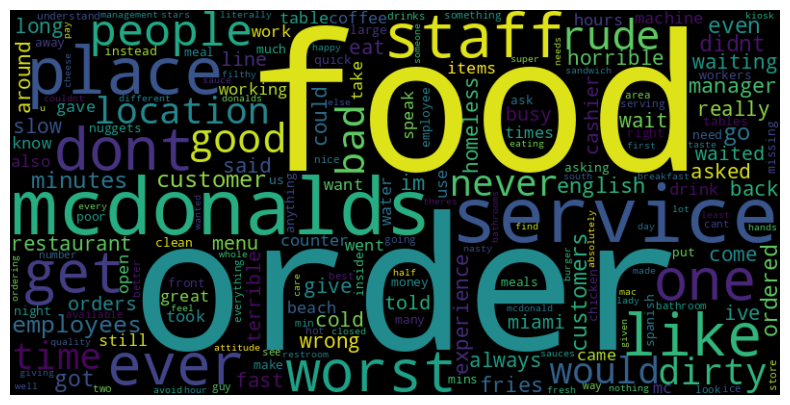

In [ ]:
top = Counter([item for sublist in DatasetOnlyReviewsForWorstCity['Words'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])

wordcloud_data = temp_neutral.set_index('Common_words')['count'].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
DatasetOnlyReviewsForPositive = Dataset[Dataset['Sentiment'] == 'positive']
DatasetOnlyReviewsForNegative = Dataset[Dataset['Sentiment'] == 'negative']

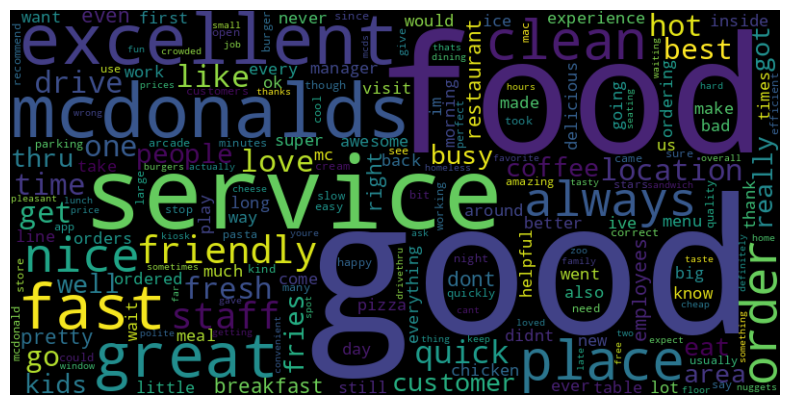

In [ ]:
top = Counter([item for sublist in DatasetOnlyReviewsForPositive['Words'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])

wordcloud_data = temp_neutral.set_index('Common_words')['count'].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

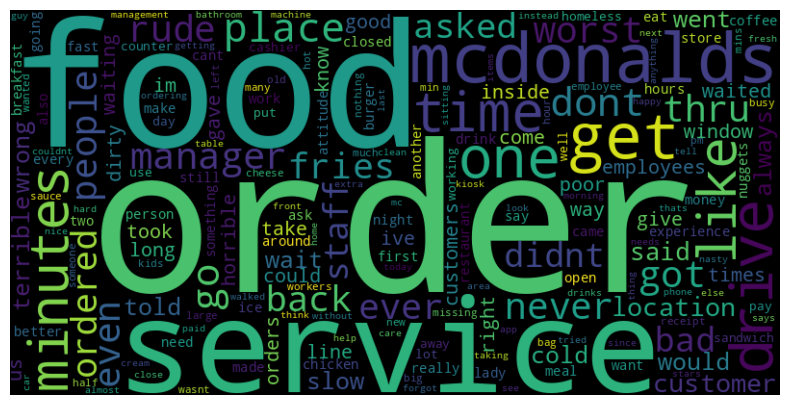

In [ ]:
top = Counter([item for sublist in DatasetOnlyReviewsForNegative['Words'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(), columns=['Common_words', 'count'])

wordcloud_data = temp_neutral.set_index('Common_words')['count'].to_dict()

wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(wordcloud_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
Dataset["SentimentCompound"] = Dataset['review'].apply(lambda text: analyzer.polarity_scores(text)['compound'])
Dataset["SentimentPostive"] = Dataset['review'].apply(lambda text: analyzer.polarity_scores(text)['pos'])
Dataset["SentimentNegative"] = Dataset['review'].apply(lambda text: analyzer.polarity_scores(text)['neg'])
Dataset["SentimentNeutral"] = Dataset['review'].apply(lambda text: analyzer.polarity_scores(text)['neu'])

In [ ]:
Dataset['sentimentofAnalyzer'] = Dataset['SentimentCompound'].apply(lambda score: 'positive' if score >= 0.05 else ('negative' if score <= -0.05 else 'neutral'))

In [ ]:
Dataset

,store_address,latitude,longitude,rating_count,review_time,review,rating,City,State,ActualDate,Year,Words,Sentiment,SentimentCompound,SentimentPostive,SentimentNegative,SentimentNeutral,sentimentofAnalyzer
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food normal transaction...,1,Austin,TX,2023-03-19,2023,"[look, like, someone, spit, food, normal, tran...",negative,0.5541,0.184,0.047,0.769,positive
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonalds far food atmosphere go staff mak...,4,Austin,TX,2023-06-14,2023,"[itd, mcdonalds, far, food, atmosphere, go, st...",positive,0.8591,0.358,0.000,0.642,positive
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked line mov...,1,Austin,TX,2023-06-14,2023,"[made, mobile, order, got, speaker, checked, l...",negative,-0.2960,0.000,0.096,0.904,negative
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispy chicken sandwich customer service qu...,5,Austin,TX,2023-05-19,2023,"[mc, crispy, chicken, sandwich, customer, serv...",positive,0.0000,0.000,0.000,1.000,neutral
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order times drive thru still manage mes...,1,Austin,TX,2023-04-19,2023,"[repeat, order, times, drive, thru, still, man...",negative,-0.7184,0.000,0.200,0.800,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32731,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,treated badly,1,Miami,FL,2019-06-19,2019,"[treated, badly]",negative,-0.4767,0.000,0.756,0.244,negative
32732,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,service good,5,Miami,FL,2022-06-19,2022,"[service, good]",positive,0.4404,0.744,0.000,0.256,positive
32733,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,remove hunger enough,4,Miami,FL,2022-06-19,2022,"[remove, hunger, enough]",positive,-0.2500,0.000,0.500,0.500,negative
32734,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,good lately become expensive,5,Miami,FL,2018-06-19,2018,"[good, lately, become, expensive]",positive,0.4404,0.492,0.000,0.508,positive


In [ ]:
Dataset.isna().sum()

store_address          0
latitude               0
longitude              0
rating_count           0
review_time            0
review                 0
rating                 0
City                   0
State                  0
ActualDate             0
Year                   0
Words                  0
Sentiment              0
SentimentCompound      0
SentimentPostive       0
SentimentNegative      0
SentimentNeutral       0
sentimentofAnalyzer    0
dtype: int64

In [ ]:
Dataset.isnull().values.any()

False

### Sentiment Analysis Modeling

In [ ]:
X = Dataset[['review','SentimentPostive','SentimentNegative','SentimentNeutral']]
Y = Dataset['Sentiment']

In [ ]:
Y.value_counts()

positive    15705
negative    12325
neutral      4706
Name: Sentiment, dtype: int64

#### Splitting the data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [ ]:
y_test.value_counts()

positive    3142
negative    2465
neutral      941
Name: Sentiment, dtype: int64

In [ ]:
y_train.value_counts()

positive    12563
negative     9860
neutral      3765
Name: Sentiment, dtype: int64

#### Initializing the tf-idf Vectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer()

#### Traning all the Models.

In [ ]:
models = {
    'Logistic Regression': {
        'model': LogisticRegression(),
        'param_distributions': {'C': uniform(0.1, 10), 'penalty': ['l1', 'l2'] , 'solver' : ['liblinear', 'newton-cg','sag']}
    },
    'Random Forest': {
        'model': RandomForestClassifier(),
        'param_distributions': {}
    },
    'BernouliNB': {
        'model': BernoulliNB(),
        'param_distributions': {}
    },
    'MultinomialNB': {
    'model': MultinomialNB(),
    'param_distributions': {}
    },
    'SVC': {
    'model': SVC(),
    'param_distributions': {}
    }
}

In [ ]:
def ValidationResults(models):
  columns = ['Model' , 'Class', 'Precision', 'Recall', 'F1-Score', 'Support']
  classification_reports_df = pd.DataFrame(columns=columns)

  for model_name, modelparams in models.items():
        print(f"\nTraining {model_name}...")

        # Create Stratified K-Fold Cross-Validator
        stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

        # Lists to store results for each fold
        precision_list_postive, recall_list_postive, f1_score_list_positive, support_list_postive = [], [], [], []
        precision_list_negative, recall_list_negtive, f1_score_list_negative, support_list_negative = [], [], [], []
        precision_list_neutral, recall_list_neutral, f1_score_list_neutral, support_list_neutral = [], [], [], []

        foldnumber = 1
        # Iterate over each fold
        for train_index, test_index in stratified_kfold.split(X_train, y_train):
            print("Processing fold number : ", foldnumber)
            X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
            y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

            tfidf_matrix_trainset = tfidf_vectorizer.fit_transform(X_train_fold['review'])
            tfidf_matrix_testset = tfidf_vectorizer.transform(X_test_fold['review'])

            col1train = np.array(X_train_fold['SentimentPostive']).reshape(-1, 1)
            col2train = np.array(X_train_fold['SentimentNegative']).reshape(-1, 1)
            col3train = np.array(X_train_fold['SentimentNeutral']).reshape(-1, 1)

            col1_csr_train = csr_matrix(col1train)
            col2_csr_train = csr_matrix(col2train)
            col3_csr_train = csr_matrix(col3train)

            train_csr_matrix = hstack([tfidf_matrix_trainset, col1_csr_train, col2_csr_train, col3_csr_train])

            col1_test = np.array(X_test_fold['SentimentPostive']).reshape(-1, 1)
            col2_test = np.array(X_test_fold['SentimentNegative']).reshape(-1, 1)
            col3_test = np.array(X_test_fold['SentimentNeutral']).reshape(-1, 1)

            col1_csr_test = csr_matrix(col1_test)
            col2_csr_test = csr_matrix(col2_test)
            col3_csr_test = csr_matrix(col3_test)

            test_csr_matrix = hstack([tfidf_matrix_testset, col1_csr_test, col2_csr_test, col3_csr_test])

            #random_search = RandomizedSearchCV(modelparams['model'], param_distributions=modelparams['param_distributions'], cv=3)

            # Fit the model random search cv
            #random_search.fit(X_train_fold, y_train_fold)

            # Make predictions on the test set
            #y_pred = random_search.best_estimator_.predict(X_test_fold)

            # Fit the model
            modelparams['model'].fit(train_csr_matrix, y_train_fold)

            # Make prediction on test fold
            y_pred = modelparams['model'].predict(test_csr_matrix)

            # Generate classification report for the fold
            report_dict = classification_report(y_test_fold, y_pred, output_dict=True)

            # Extract relevant metrics for the fold
            metricsPostive = report_dict['positive']
            metricsNeutral = report_dict['neutral']
            metricsNegative = report_dict['negative']

            precision_list_postive.append(metricsPostive['precision'])
            recall_list_postive.append(metricsPostive['recall'])
            f1_score_list_positive.append(metricsPostive['f1-score'])
            support_list_postive.append(metricsPostive['support'])

            precision_list_negative.append(metricsNegative['precision'])
            recall_list_negtive.append(metricsNegative['recall'])
            f1_score_list_negative.append(metricsNegative['f1-score'])
            support_list_negative.append(metricsNegative['support'])

            precision_list_neutral.append(metricsNeutral['precision'])
            recall_list_neutral.append(metricsNeutral['recall'])
            f1_score_list_neutral.append(metricsNeutral['f1-score'])
            support_list_neutral.append(metricsNeutral['support'])

            foldnumber += 1

        # Calculate average metrics across folds
        avg_precision_postive = sum(precision_list_postive) / len(precision_list_postive)
        avg_recall_positive = sum(recall_list_postive) / len(recall_list_postive)
        avg_f1_score_postive = sum(f1_score_list_positive) / len(f1_score_list_positive)
        avg_support_postive = sum(support_list_postive) / len(support_list_postive)

        avg_precision_negative = sum(precision_list_negative) / len(precision_list_negative)
        avg_recall_negative = sum(recall_list_negtive) / len(recall_list_negtive)
        avg_f1_score_negative = sum(f1_score_list_negative) / len(f1_score_list_negative)
        avg_support_negative = sum(support_list_negative) / len(support_list_negative)

        avg_precision_neutral = sum(precision_list_neutral) / len(precision_list_neutral)
        avg_recall_neutral = sum(recall_list_neutral) / len(recall_list_neutral)
        avg_f1_score_neutral = sum(f1_score_list_neutral) / len(f1_score_list_neutral)
        avg_support_neutral = sum(support_list_neutral) / len(support_list_neutral)

        postive = [model_name, 'postive' , avg_precision_postive, avg_recall_positive, avg_f1_score_postive, avg_support_postive]
        negative = [model_name, 'negative' , avg_precision_negative, avg_recall_negative, avg_f1_score_negative, avg_support_negative]
        neutral = [model_name, 'neutral' , avg_precision_neutral, avg_recall_neutral, avg_f1_score_neutral, avg_support_neutral]

        new_rows = [
        pd.Series(postive, index=columns),
        pd.Series(negative, index=columns),
        pd.Series(neutral, index=columns)
        ]

        #Appending rows to the dataframe
        classification_reports_df = pd.concat([classification_reports_df] + [row.to_frame().T for row in new_rows], ignore_index=True)

  return classification_reports_df

In [ ]:
Classificaition_Report_Validation_Results = ValidationResults(models)


Training Logistic Regression...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5

Training Random Forest...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5

Training BernouliNB...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5

Training MultinomialNB...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5

Training SVC...
Processing fold number :  1
Processing fold number :  2
Processing fold number :  3
Processing fold number :  4
Processing fold number :  5


In [ ]:
Classificaition_Report_Validation_Results

,Model,Class,Precision,Recall,F1-Score,Support
0,Logistic Regression,postive,0.84135,0.904242,0.871645,2512.6
1,Logistic Regression,negative,0.805692,0.893611,0.847354,1972.0
2,Logistic Regression,neutral,0.715002,0.332005,0.453298,753.0
3,Random Forest,postive,0.845446,0.90878,0.875957,2512.6
4,Random Forest,negative,0.811475,0.902333,0.854473,1972.0
5,Random Forest,neutral,0.850564,0.388313,0.533018,753.0
6,BernouliNB,postive,0.700134,0.904959,0.789458,2512.6
7,BernouliNB,negative,0.787985,0.657505,0.716756,1972.0
8,BernouliNB,neutral,0.644307,0.294024,0.403661,753.0
9,MultinomialNB,postive,0.831211,0.890154,0.859637,2512.6


#### Best Model Result on Test Set.

In [ ]:
tfidf_matrix_fullTrainingModel = tfidf_vectorizer.fit_transform(X_train)
tfidf_matrix_fullTestModel = tfidf_vectorizer.transform(X_test)

models['Random Forest']['model'].fit(tfidf_matrix_fullTrainingModel, y_train)
y_pred = models['Random Forest']['model'].predict(tfidf_matrix_fullTestModel)

print("Classification Report on Final Test Set:")
print(classification_report(y_test, y_pred))

Classification Report on Final Test Set:
              precision    recall  f1-score   support

    negative       0.82      0.91      0.86      2465
     neutral       0.85      0.40      0.54       941
    positive       0.85      0.91      0.88      3142

    accuracy                           0.84      6548
   macro avg       0.84      0.74      0.76      6548
weighted avg       0.84      0.84      0.82      6548



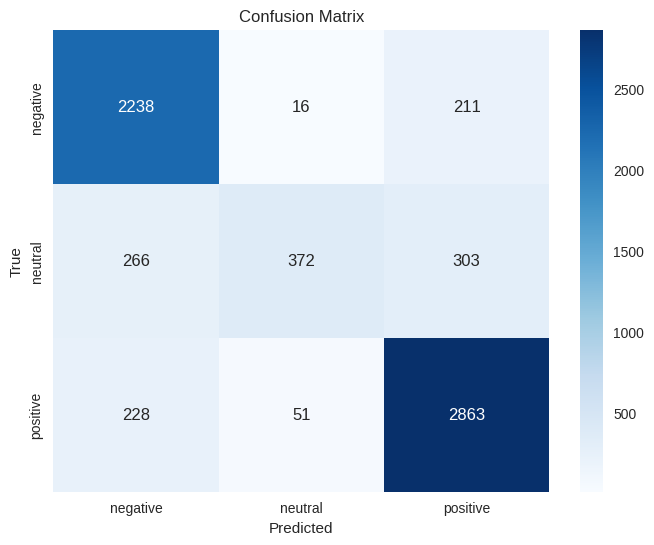

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

#### Bert Modeling

In [ ]:
Dataset

,store_address,latitude,longitude,rating_count,review_time,review,rating,City,State,Words,Sentiment
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food normal transaction...,1,Austin,TX,"[look, like, someone, spit, food, normal, tran...",negative
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonalds far food atmosphere go staff mak...,4,Austin,TX,"[itd, mcdonalds, far, food, atmosphere, go, st...",positive
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked line mov...,1,Austin,TX,"[made, mobile, order, got, speaker, checked, l...",negative
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispy chicken sandwich customer service qu...,5,Austin,TX,"[mc, crispy, chicken, sandwich, customer, serv...",positive
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order times drive thru still manage mes...,1,Austin,TX,"[repeat, order, times, drive, thru, still, man...",negative
...,...,...,...,...,...,...,...,...,...,...,...
32731,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,treated badly,1,Miami,FL,"[treated, badly]",negative
32732,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,service good,5,Miami,FL,"[service, good]",positive
32733,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,remove hunger enough,4,Miami,FL,"[remove, hunger, enough]",positive
32734,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,good lately become expensive,5,Miami,FL,"[good, lately, become, expensive]",positive


In [ ]:
DataFrameBert = Dataset.copy(deep=True)

In [ ]:
DataFrameBert

,store_address,latitude,longitude,rating_count,review_time,review,rating,City,State,Words,Sentiment
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food normal transaction...,1,Austin,TX,"[look, like, someone, spit, food, normal, tran...",negative
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonalds far food atmosphere go staff mak...,4,Austin,TX,"[itd, mcdonalds, far, food, atmosphere, go, st...",positive
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked line mov...,1,Austin,TX,"[made, mobile, order, got, speaker, checked, l...",negative
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispy chicken sandwich customer service qu...,5,Austin,TX,"[mc, crispy, chicken, sandwich, customer, serv...",positive
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order times drive thru still manage mes...,1,Austin,TX,"[repeat, order, times, drive, thru, still, man...",negative
...,...,...,...,...,...,...,...,...,...,...,...
32731,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,treated badly,1,Miami,FL,"[treated, badly]",negative
32732,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,service good,5,Miami,FL,"[service, good]",positive
32733,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,remove hunger enough,4,Miami,FL,"[remove, hunger, enough]",positive
32734,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,good lately become expensive,5,Miami,FL,"[good, lately, become, expensive]",positive


In [ ]:
# label_encoder = LabelEncoder()
# DataFrameBert['Sentiment'] = label_encoder.fit_transform(DataFrameBert['Sentiment'])

In [ ]:
label_map = {'positive': 0, 'negative': 1, 'neutral': 2}  # Map labels to numeric values
DataFrameBert['Sentiment'] = DataFrameBert['Sentiment'].map(label_map)

In [ ]:
DataFrameBert['Sentiment'].astype(int)

0        1
1        0
2        1
3        0
4        1
        ..
32731    1
32732    0
32733    0
32734    0
32735    0
Name: Sentiment, Length: 32736, dtype: int64

In [ ]:
DataFrameBert

,store_address,latitude,longitude,rating_count,review_time,review,rating,City,State,ActualDate,Year,Words,Sentiment
0,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,look like someone spit food normal transaction...,1,Austin,TX,2023-03-19,2023,"[look, like, someone, spit, food, normal, tran...",1
1,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,itd mcdonalds far food atmosphere go staff mak...,4,Austin,TX,2023-06-14,2023,"[itd, mcdonalds, far, food, atmosphere, go, st...",0
2,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,made mobile order got speaker checked line mov...,1,Austin,TX,2023-06-14,2023,"[made, mobile, order, got, speaker, checked, l...",1
3,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,mc crispy chicken sandwich customer service qu...,5,Austin,TX,2023-05-19,2023,"[mc, crispy, chicken, sandwich, customer, serv...",0
4,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,repeat order times drive thru still manage mes...,1,Austin,TX,2023-04-19,2023,"[repeat, order, times, drive, thru, still, man...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32731,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",4 years ago,treated badly,1,Miami,FL,2019-06-19,2019,"[treated, badly]",1
32732,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,service good,5,Miami,FL,2022-06-19,2022,"[service, good]",0
32733,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",a year ago,remove hunger enough,4,Miami,FL,2022-06-19,2022,"[remove, hunger, enough]",0
32734,"3501 Biscayne Blvd, Miami, FL 33137, United St...",25.810000,-80.189098,"2,810",5 years ago,good lately become expensive,5,Miami,FL,2018-06-19,2018,"[good, lately, become, expensive]",0


In [ ]:
Xbert = DataFrameBert['review']
Ybert = DataFrameBert['Sentiment']

In [ ]:
Xbert = list(Xbert)

In [ ]:
Xbert

0        look like someone spit food normal transaction...
1        itd mcdonalds far food atmosphere go staff mak...
2        made mobile order got speaker checked line mov...
3        mc crispy chicken sandwich customer service qu...
4        repeat order times drive thru still manage mes...
                               ...                        
32731                                        treated badly
32732                                         service good
32733                                 remove hunger enough
32734                         good lately become expensive
32735                                       took good care
Name: review, Length: 32736, dtype: object

In [ ]:
Ybert = Ybert.to_numpy()

In [ ]:
Ybert

0        negative
1        positive
2        negative
3        positive
4        negative
           ...   
32731    negative
32732    positive
32733    positive
32734    positive
32735    positive
Name: Sentiment, Length: 32736, dtype: object

In [ ]:
Ybert.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

In [ ]:
train_texts, val_texts, train_labels, val_labels = train_test_split(Xbert, Ybert, test_size=0.2, shuffle=False)

In [ ]:
val_texts

26188    appears location burned leveled reconstruction...
26189    fast food right service friendlier youd normal...
26190    new menu board finally accurate food nuggets w...
26191    always buy ice coffee usually perfect times ta...
26192    standard mcdonalds menu staff friendly restaur...
                               ...                        
32731                                        treated badly
32732                                         service good
32733                                 remove hunger enough
32734                         good lately become expensive
32735                                       took good care
Name: review, Length: 6548, dtype: object

In [ ]:
train_labels.value_counts()

2    12676
0     9615
1     3897
Name: Sentiment, dtype: int64

In [ ]:
train_labels.to_numpy()

array([0, 2, 0, ..., 0, 0, 2])

In [ ]:
val_labels.value_counts()

2    3029
0    2710
1     809
Name: Sentiment, dtype: int64

In [ ]:
Ybert.value_counts()

2    15705
0    12325
1     4706
Name: Sentiment, dtype: int64

In [ ]:
max_length = max(len(sublist) for sublist in train_texts)

In [ ]:
max_length

1789

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
tokenized_texts = train_texts.apply(lambda x: tokenizer.encode(x, add_special_tokens=True,truncation=True,max_length=1789))

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
train_labels

0        negative
1        positive
2        negative
3        positive
4        negative
           ...   
26183    negative
26184    negative
26185    negative
26186    negative
26187    positive
Name: Sentiment, Length: 26188, dtype: object

In [ ]:
tokenized_texts

0        [101, 2298, 2066, 2619, 13183, 2833, 3671, 125...
1        [101, 2009, 2094, 9383, 2015, 2521, 2833, 7224...
2        [101, 2081, 4684, 2344, 2288, 5882, 7039, 2240...
3        [101, 11338, 15594, 2100, 7975, 11642, 8013, 2...
4        [101, 9377, 2344, 2335, 3298, 27046, 2145, 613...
                               ...                        
26183    [101, 5409, 9383, 2015, 2131, 6350, 2428, 2220...
26184    [101, 2028, 4788, 6322, 4921, 2063, 2412, 2938...
26185    [101, 2173, 2904, 2843, 10760, 2100, 5293, 234...
26186    [101, 6752, 2116, 4449, 22201, 6881, 2175, 236...
26187    [101, 2467, 4248, 3733, 3295, 3266, 2562, 2173...
Name: review, Length: 26188, dtype: object

In [ ]:
tokenized_texts

0        [101, 2298, 2066, 2619, 13183, 2833, 3671, 125...
1        [101, 2009, 2094, 9383, 2015, 2521, 2833, 7224...
2        [101, 2081, 4684, 2344, 2288, 5882, 7039, 2240...
3        [101, 11338, 15594, 2100, 7975, 11642, 8013, 2...
4        [101, 9377, 2344, 2335, 3298, 27046, 2145, 613...
                               ...                        
26183    [101, 5409, 9383, 2015, 2131, 6350, 2428, 2220...
26184    [101, 2028, 4788, 6322, 4921, 2063, 2412, 2938...
26185    [101, 2173, 2904, 2843, 10760, 2100, 5293, 234...
26186    [101, 6752, 2116, 4449, 22201, 6881, 2175, 236...
26187    [101, 2467, 4248, 3733, 3295, 3266, 2562, 2173...
Name: review, Length: 26188, dtype: object

In [ ]:
max_length = max(len(sublist) for sublist in tokenized_texts)

In [ ]:
max_length

305

In [ ]:
model = BertModel.from_pretrained('bert-base-uncased')
model.eval()

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

In [ ]:
bert_embeddings = []
i = 1
with torch.no_grad():
    for tokens in tokenized_texts:
        print(tokens)
        input_ids = torch.tensor([tokens])
        outputs = model(input_ids)
        last_hidden_states = outputs.last_hidden_state
        pooled_output = torch.mean(last_hidden_states, dim=1).squeeze().numpy()  # Pooling strategy: Mean pooling
        bert_embeddings.append(pooled_output)
        print("done  with ", i )
        i += 1

In [ ]:
bert_embeddings = np.array(bert_embeddings)

In [ ]:
bert_embeddings

array([[ 0.17612804,  0.34901217,  0.50023353, ..., -0.19920334,
        -0.00188056, -0.02437036],
       [ 0.0540089 , -0.09791368,  0.7271694 , ..., -0.27786833,
         0.14482094, -0.18183157],
       [ 0.18505818, -0.3169128 ,  0.6036597 , ..., -0.5431559 ,
        -0.3633692 , -0.06441787],
       ...,
       [ 0.0448206 ,  0.34905428,  0.44003063, ..., -0.22478203,
         0.05313009, -0.14006183],
       [ 0.59428173,  0.0511158 ,  0.5048027 , ..., -0.20351253,
         0.22926472, -0.16437298],
       [ 0.19639465, -0.24931832,  0.3355874 , ..., -0.34115168,
        -0.11023269,  0.19174303]], dtype=float32)

In [ ]:
X = bert_embeddings
y = train_labels

In [ ]:
classifier = SVC()
classifier.fit(X, y)

SVC()

In [ ]:
val_tokenized_texts = val_texts.apply(lambda x: tokenizer.encode(x, add_special_tokens=True, truncation=True, max_length=128))
val_bert_embeddings = []
i = 1
with torch.no_grad():
    for tokens in val_tokenized_texts:
        print(tokens)
        input_ids = torch.tensor([tokens])
        outputs = model(input_ids)
        last_hidden_states = outputs.last_hidden_state
        pooled_output = torch.mean(last_hidden_states, dim=1).squeeze().numpy()  # Pooling strategy: Mean pooling
        val_bert_embeddings.append(pooled_output)
        print(i)
        i += 1

In [ ]:
val_bert_embeddings = np.array(val_bert_embeddings)
val_X = val_bert_embeddings
val_y = val_labels

In [ ]:
val_predictions = classifier.predict(val_X)
print(classification_report(val_y, val_predictions))

              precision    recall  f1-score   support

    negative       0.81      0.90      0.85      2710
     neutral       0.79      0.20      0.31       809
    positive       0.83      0.91      0.86      3029

    accuracy                           0.82      6548
   macro avg       0.81      0.67      0.68      6548
weighted avg       0.81      0.82      0.79      6548



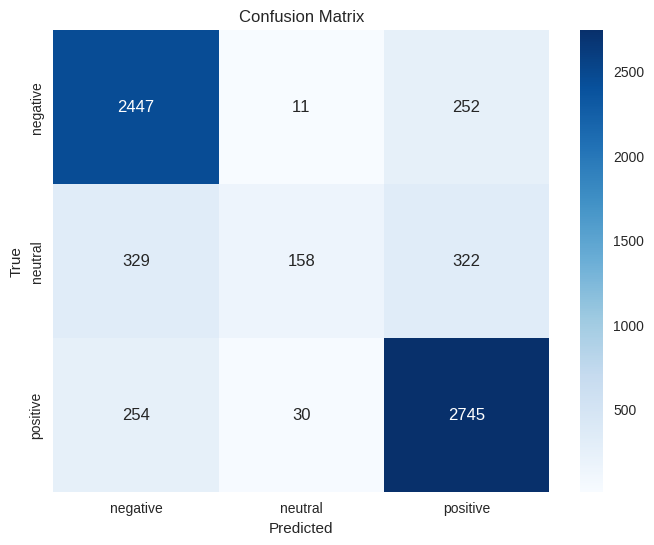

In [ ]:
conf_mat = confusion_matrix(val_y, val_predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(val_y), yticklabels=np.unique(val_y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
classifierrf = RandomForestClassifier()
classifierrf.fit(X, y)

RandomForestClassifier()

In [ ]:
val_predictions_rf = classifierrf.predict(val_X)
print(classification_report(val_y, val_predictions_rf))

              precision    recall  f1-score   support

    negative       0.93      0.93      0.93      2710
     neutral       0.89      0.67      0.77       809
    positive       0.90      0.95      0.92      3029

    accuracy                           0.91      6548
   macro avg       0.90      0.85      0.87      6548
weighted avg       0.91      0.91      0.91      6548



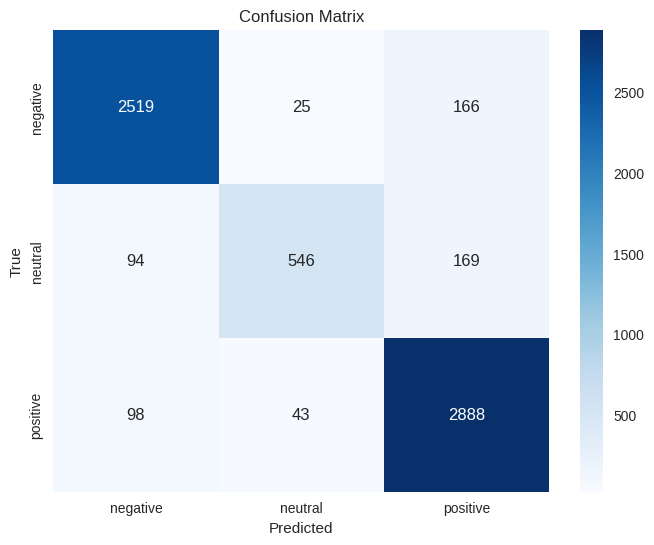

In [ ]:
conf_mat = confusion_matrix(val_y, val_predictions_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(val_y), yticklabels=np.unique(val_y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(list(val_texts), truncation=True, padding=True, max_length=128)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
train_dataset = TensorDataset(torch.tensor(train_encodings['input_ids']),
                              torch.tensor(train_encodings['attention_mask']),
                              torch.tensor(train_labels))

In [ ]:
val_dataset = TensorDataset(torch.tensor(val_encodings['input_ids']),
                            torch.tensor(val_encodings['attention_mask']),
                            torch.tensor(val_labels))

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # Adjust num_labels according to your sentiment classes
optimizer = AdamW(model.parameters())

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:429: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model.to(device)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [ ]:
model.train()
for epoch in range(3):  # Adjust number of epochs
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        print(optimizer)

loss is :  tensor(1.2202, grad_fn=<NllLossBackward0>)
AdamW (
Parameter Group 0
    betas: (0.9, 0.999)
    correct_bias: True
    eps: 1e-06
    lr: 0.001
    weight_decay: 0.0
)
loss is :  tensor(1.1395, grad_fn=<NllLossBackward0>)
AdamW (
Parameter Group 0
    betas: (0.9, 0.999)
    correct_bias: True
    eps: 1e-06
    lr: 0.001
    weight_decay: 0.0
)
loss is :  tensor(1.2726, grad_fn=<NllLossBackward0>)
AdamW (
Parameter Group 0
    betas: (0.9, 0.999)
    correct_bias: True
    eps: 1e-06
    lr: 0.001
    weight_decay: 0.0
)
loss is :  tensor(2.4702, grad_fn=<NllLossBackward0>)


KeyboardInterrupt: 

### Time Series Graph

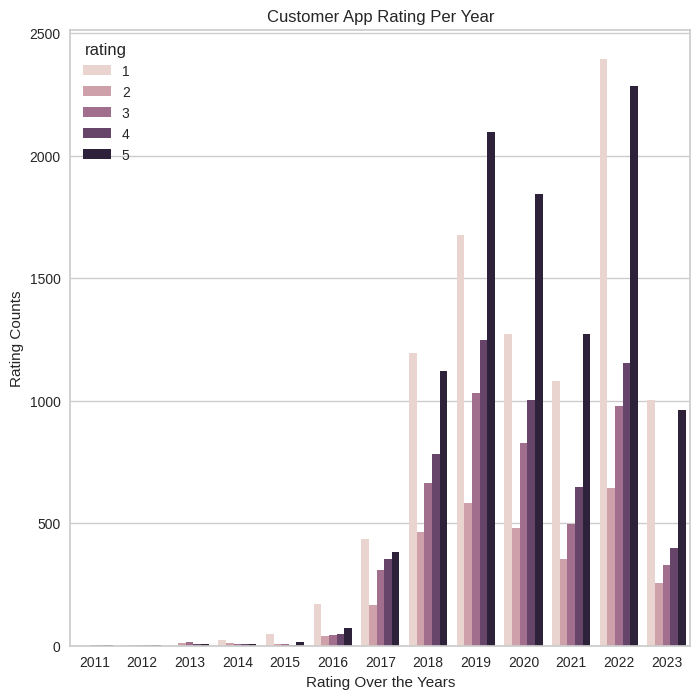

In [ ]:
plt.figure(figsize=(8, 8))
sns.countplot(x = 'Year', hue ='rating', data = Dataset)
plt.title('Customer App Rating Per Year')
plt.xlabel("Rating Over the Years")
plt.ylabel('Rating Counts')
plt.show()

In [ ]:
average_ratings = Dataset.groupby('Year')['rating'].mean().reset_index()

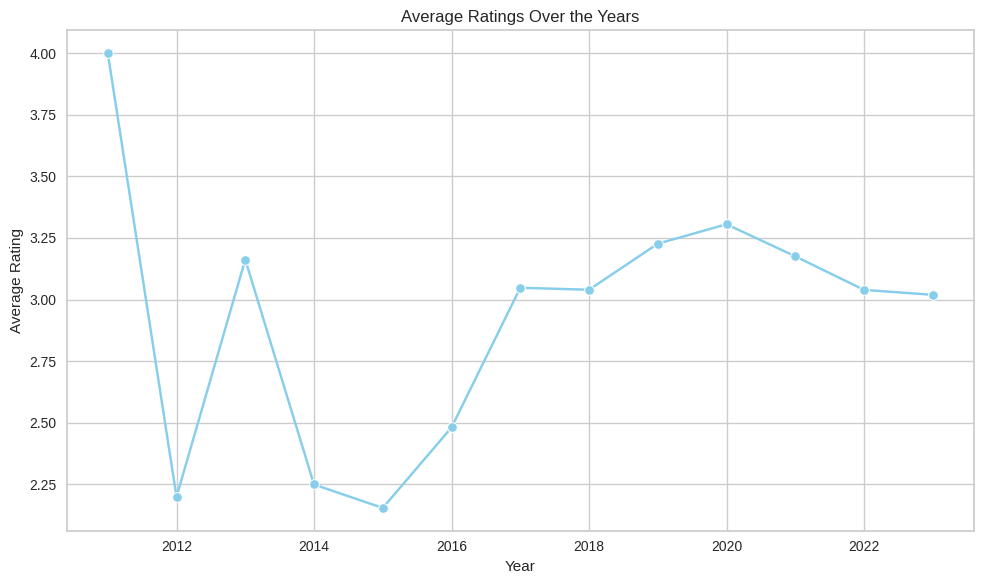

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_ratings, x='Year', y='rating', marker='o', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Ratings Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
average_ratings

,Year,rating
0,2011,4.000000
1,2012,2.200000
2,2013,3.162162
3,2014,2.250000
4,2015,2.154762
5,2016,2.481283
6,2017,3.048054
7,2018,3.040000
8,2019,3.226594
9,2020,3.305622


#### Rating Forecasting

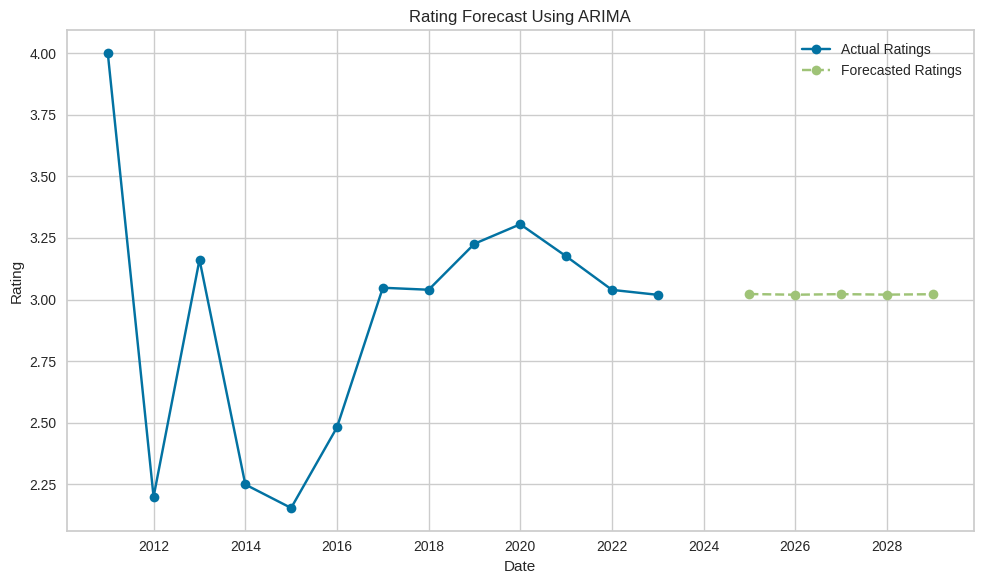

In [ ]:

# Example DataFrame with 'Date' and 'Rating' columns
data = {'Date': ['2011-01-01', '2012-01-01', '2013-01-01' , '2014-01-01' , '2015-01-01' , '2016-01-01' , '2017-01-01' , '2018-01-01' , '2019-01-01' , '2020-01-01' , '2021-01-01' , '2022-01-01' , '2023-01-01' ],
        'Rating':  average_ratings['rating']}

df = pd.DataFrame(data)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' column as index
df.set_index('Date', inplace=True)

# Fit ARIMA model
model = ARIMA(df['Rating'], order=(1,1,1))  # Example order, you may need to tune these parameters
fit_model = model.fit()

# Forecast
forecast_steps = 5  # Number of periods to forecast
forecast = fit_model.forecast(steps=forecast_steps)

# Plot original data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Rating'], label='Actual Ratings', marker='o')
plt.plot(pd.date_range(start=df.index[-1], periods=forecast_steps+1, freq='Y')[1:], forecast, label='Forecasted Ratings', linestyle='--', marker='o')
plt.xlabel('Date')
plt.ylabel('Rating')
plt.title('Rating Forecast Using ARIMA')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()